In [321]:
import pandas as pd
import numpy as np

In [322]:
df = pd.read_csv('./desafio-sql/DB_Teste.csv', sep=';').drop('Unnamed: 10', axis=1)

In [323]:
df

,Cliente,ID,Tipo,Data da Venda,Categoria,Vendedor,Regional,Duração do Contrato (Meses),Equipe,Valor
0,Cliente 1,2017-0022,Serviços,02/01/2018,Novo Logo,Vendedor 1,Brasil,1,Time 1,"R$ 24.800,00"
1,Cliente 10,2018-0088,Serviços,14/02/2018,Novo Logo,Vendedor 1,Brasil,6,Time 1,"R$ 302.720,00"
2,Cliente 10,2018-0104,Serviços,13/03/2018,Upselling,Vendedor 1,Brasil,1,Time 1,"R$ 51.894,86"
3,Cliente 10,2018-0168,Serviços,30/04/2018,Upselling,Vendedor 1,Brasil,2,Time 1,"R$ 51.894,86"
4,Cliente 10,2018-0169,Serviços,30/04/2018,Upselling,Vendedor 1,Brasil,2,Time 1,"R$ 51.894,86"
...,...,...,...,...,...,...,...,...,...,...
848,Cliente 96,2020-2928,Serviços,30/10/2020,Cross selling,Vendedor 1,Brasil,14,Time 1,"R$ 273.000,00"
849,Cliente 96,2021-3613,Produtos,15/03/2021,Upselling,Vendedor 13,Brasil,24,Time 3,"R$ 120.964,32"
850,Cliente 97,2020-2164,Produtos,07/05/2020,Novo Logo,Vendedor 19,Brasil,39,Time 3,"R$ 281.880,00"
851,Cliente 98,2020-2285,Produtos,11/05/2020,Novo Logo,Vendedor 19,Brasil,12,Time 3,"R$ 720.000,00"


# Trametamento dos dados

In [324]:
df.isnull().sum()

Cliente                        0
ID                             0
Tipo                           0
Data da Venda                  0
Categoria                      0
Vendedor                       0
Regional                       0
Duração do Contrato (Meses)    0
Equipe                         0
Valor                          0
dtype: int64

In [325]:
df.duplicated().sum()

0

In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 853 entries, 0 to 852
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Cliente                      853 non-null    object
 1   ID                           853 non-null    object
 2   Tipo                         853 non-null    object
 3   Data da Venda                853 non-null    object
 4   Categoria                    853 non-null    object
 5   Vendedor                     853 non-null    object
 6   Regional                     853 non-null    object
 7   Duração do Contrato (Meses)  853 non-null    int64 
 8   Equipe                       853 non-null    object
 9   Valor                        853 non-null    object
dtypes: int64(1), object(9)
memory usage: 66.8+ KB


In [327]:
df

,Cliente,ID,Tipo,Data da Venda,Categoria,Vendedor,Regional,Duração do Contrato (Meses),Equipe,Valor
0,Cliente 1,2017-0022,Serviços,02/01/2018,Novo Logo,Vendedor 1,Brasil,1,Time 1,"R$ 24.800,00"
1,Cliente 10,2018-0088,Serviços,14/02/2018,Novo Logo,Vendedor 1,Brasil,6,Time 1,"R$ 302.720,00"
2,Cliente 10,2018-0104,Serviços,13/03/2018,Upselling,Vendedor 1,Brasil,1,Time 1,"R$ 51.894,86"
3,Cliente 10,2018-0168,Serviços,30/04/2018,Upselling,Vendedor 1,Brasil,2,Time 1,"R$ 51.894,86"
4,Cliente 10,2018-0169,Serviços,30/04/2018,Upselling,Vendedor 1,Brasil,2,Time 1,"R$ 51.894,86"
...,...,...,...,...,...,...,...,...,...,...
848,Cliente 96,2020-2928,Serviços,30/10/2020,Cross selling,Vendedor 1,Brasil,14,Time 1,"R$ 273.000,00"
849,Cliente 96,2021-3613,Produtos,15/03/2021,Upselling,Vendedor 13,Brasil,24,Time 3,"R$ 120.964,32"
850,Cliente 97,2020-2164,Produtos,07/05/2020,Novo Logo,Vendedor 19,Brasil,39,Time 3,"R$ 281.880,00"
851,Cliente 98,2020-2285,Produtos,11/05/2020,Novo Logo,Vendedor 19,Brasil,12,Time 3,"R$ 720.000,00"


In [328]:
df['Valor']=df['Valor'].str.replace(r'\D+','', regex=True).astype(float) / 100


In [329]:
df

,Cliente,ID,Tipo,Data da Venda,Categoria,Vendedor,Regional,Duração do Contrato (Meses),Equipe,Valor
0,Cliente 1,2017-0022,Serviços,02/01/2018,Novo Logo,Vendedor 1,Brasil,1,Time 1,24800.00
1,Cliente 10,2018-0088,Serviços,14/02/2018,Novo Logo,Vendedor 1,Brasil,6,Time 1,302720.00
2,Cliente 10,2018-0104,Serviços,13/03/2018,Upselling,Vendedor 1,Brasil,1,Time 1,51894.86
3,Cliente 10,2018-0168,Serviços,30/04/2018,Upselling,Vendedor 1,Brasil,2,Time 1,51894.86
4,Cliente 10,2018-0169,Serviços,30/04/2018,Upselling,Vendedor 1,Brasil,2,Time 1,51894.86
...,...,...,...,...,...,...,...,...,...,...
848,Cliente 96,2020-2928,Serviços,30/10/2020,Cross selling,Vendedor 1,Brasil,14,Time 1,273000.00
849,Cliente 96,2021-3613,Produtos,15/03/2021,Upselling,Vendedor 13,Brasil,24,Time 3,120964.32
850,Cliente 97,2020-2164,Produtos,07/05/2020,Novo Logo,Vendedor 19,Brasil,39,Time 3,281880.00
851,Cliente 98,2020-2285,Produtos,11/05/2020,Novo Logo,Vendedor 19,Brasil,12,Time 3,720000.00


In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 853 entries, 0 to 852
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Cliente                      853 non-null    object 
 1   ID                           853 non-null    object 
 2   Tipo                         853 non-null    object 
 3   Data da Venda                853 non-null    object 
 4   Categoria                    853 non-null    object 
 5   Vendedor                     853 non-null    object 
 6   Regional                     853 non-null    object 
 7   Duração do Contrato (Meses)  853 non-null    int64  
 8   Equipe                       853 non-null    object 
 9   Valor                        853 non-null    float64
dtypes: float64(1), int64(1), object(8)
memory usage: 66.8+ KB


In [331]:
import seaborn as sns

In [332]:
valor_v = df.groupby(['Vendedor'])['Valor'].sum().reset_index()

In [333]:
valor_v.sort_values(by='Valor', ascending=False)

,Vendedor,Valor
22,Vendedor 3,1.662205e+08
27,Vendedor 7,5.779918e+07
1,Vendedor 10,5.221206e+07
28,Vendedor 8,4.727451e+07
0,Vendedor 1,3.092948e+07
29,Vendedor 9,2.637456e+07
4,Vendedor 13,2.483730e+07
9,Vendedor 18,2.266230e+07
21,Vendedor 29,1.907687e+07
24,Vendedor 4,1.734682e+07


/home/max/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


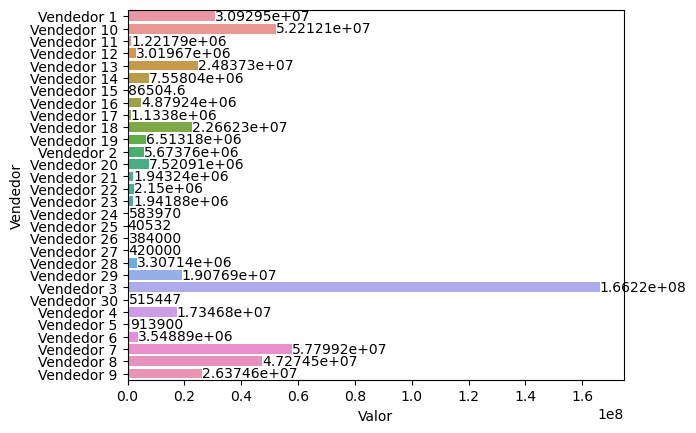

In [334]:
ax = sns.barplot(valor_v.Valor.sort_values(ascending=False), valor_v.Vendedor)
for i in ax.containers: ax.bar_label(i,)

In [335]:
df[df['Valor'] == df['Valor'].max()]

,Cliente,ID,Tipo,Data da Venda,Categoria,Vendedor,Regional,Duração do Contrato (Meses),Equipe,Valor
810,Cliente 89,2020-2073,Produtos,31/01/2020,Novo Logo,Vendedor 7,USA,37,Time 5,24970500.0


In [336]:
df.groupby('Tipo')['Valor'].mean().reset_index()

,Tipo,Valor
0,Licenciamento,983448.768963
1,Produtos,893409.190065
2,Serviços,314567.937298


In [337]:
df['Cliente'].value_counts()

Cliente 5      128
Cliente 8       61
Cliente 4       60
Cliente 10      43
Cliente 3       31
              ... 
Cliente 146      1
Cliente 144      1
Cliente 143      1
Cliente 142      1
Cliente 99       1
Name: Cliente, Length: 157, dtype: int64